<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml15_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA(Principal Component Analysis, 주성분 분석)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터셋

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits.npy

--2026-02-05 01:21:33--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-05 01:21:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-05 01:21:34--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [3]:
fruits = np.load('fruits.npy')

In [4]:
fruits.shape

(300, 100, 100)

In [10]:
def plot_img_array(arr, ncols=10):
    # arr: (n_samples, height, width) 모양의 3차원 배열
    n = len(arr)  # 배열의 아이템 개수(이미지 배열 개수)
    nrows = int(np.ceil(n / ncols))
    # figsize=(figure_width, figure_height)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1:  # axes는 1차원 배열
                if idx < n:
                    axes[idx].imshow(arr[idx], cmap=plt.cm.binary)
                axes[idx].axis('off')
            else:  # axes는 2차원 배열
                if idx < n:
                    axes[i, j].imshow(arr[idx], cmap=plt.cm.binary)
                axes[i, j].axis('off')
    plt.show()

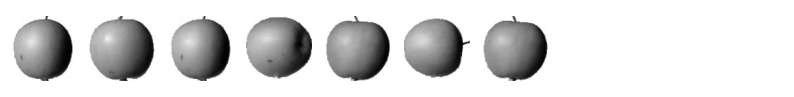

In [11]:
plot_img_array(fruits[:7])

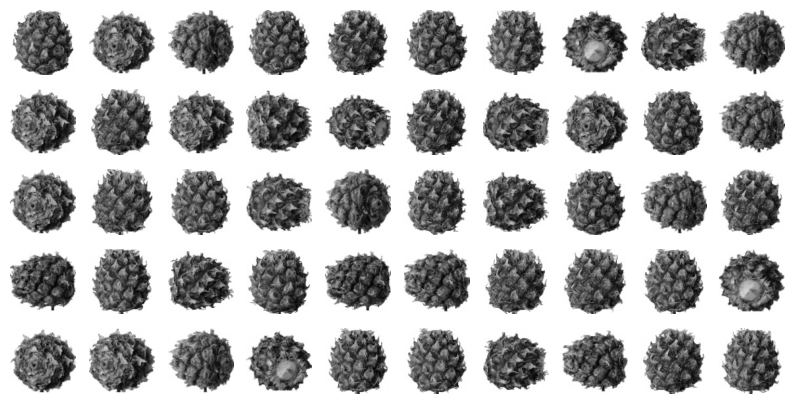

In [12]:
plot_img_array(fruits[100:150])

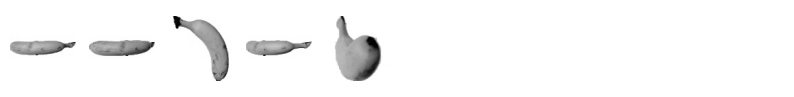

In [13]:
plot_img_array(fruits[200:205])

# PCA

*   데이터에서 분산이 최대가 되는 축을 찾음.
*   첫번째 축에서 수직(직교, orthogonal)이면서 남은 분산이 최대가 되는 축을 찾음.
*   이전에 찾은 모든 축에 수직이면서 남은 분산이 최대가 되는 축을 찾음.
*   위의 과정을 반복.
*   주성분 분석(PCA)를 사용해서 차원을 축소(압축)할 수 있음. 원래 차원으로 재구성할 수도 있음.
    *   재구성 오차가 발생함.

In [14]:
# scikit-learn 클래스는 특성 배열로 2차원 배열을 사용.
fruits_2d = fruits.reshape((300, -1))  # (300, 10000)

In [15]:
fruits_2d.shape

(300, 10000)

In [16]:
# PCA 객체 생성
pca = PCA(n_components=50, random_state=42)  # 주성분 벡터를 50개로 설정.

In [17]:
# 모델 훈련(비지도 학습) -> 50개의 주성분을 찾음
pca.fit(X=fruits_2d)

PCA(n_components=50, random_state=42)

In [18]:
# PCA가 찾은 50개의 주성분
pca.components_.shape  #> (50, 10000) => (n_components, n_features)

(50, 10000)

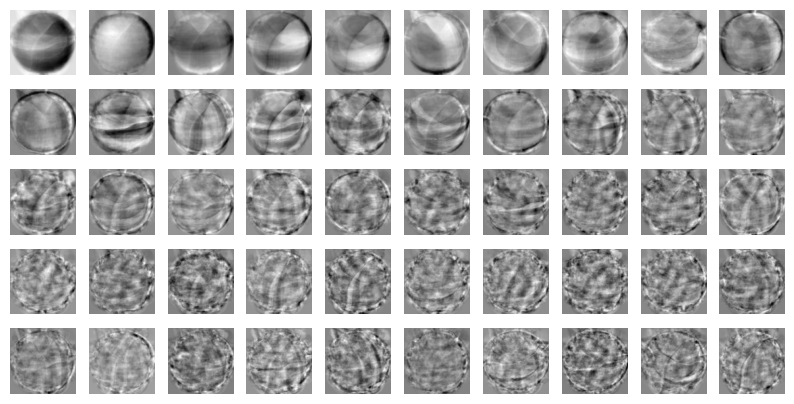

In [19]:
# PCA가 찾은 50개의 주성분 시각화
plot_img_array(pca.components_.reshape((50, 100, 100)))

## 차원 축소

`PCA.transform()` 메서드 호출.

In [20]:
# 차원 축소: (300, 10000) --> (300, 50)
fruits_2d_reduced = pca.transform(X=fruits_2d)

In [21]:
fruits_2d_reduced.shape

(300, 50)

## 차원 재구성

축소됐던 차원을 원래대로 되돌림. `PCA.inverse_transform()` 메서드 호출.

In [22]:
# 차원 재구성: (300, 50) --> (300, 10000)
reconstructed = pca.inverse_transform(X=fruits_2d_reduced)

In [23]:
reconstructed.shape

(300, 10000)

원본 과일 이미지와 차원 축소 후 재구성된 이미지 비교

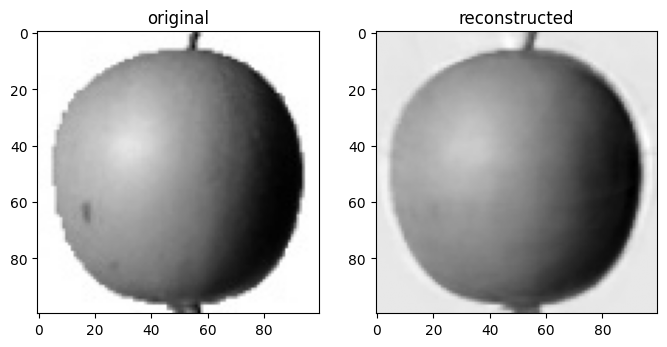

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

# 원본 이미지 시각화
axes[0].imshow(fruits[0], cmap=plt.cm.binary)
axes[0].set_title('original')

# 재구성된 이미지 시각화
axes[1].imshow(reconstructed[0].reshape(100, 100), cmap=plt.cm.binary)
axes[1].set_title('reconstructed')

plt.show()

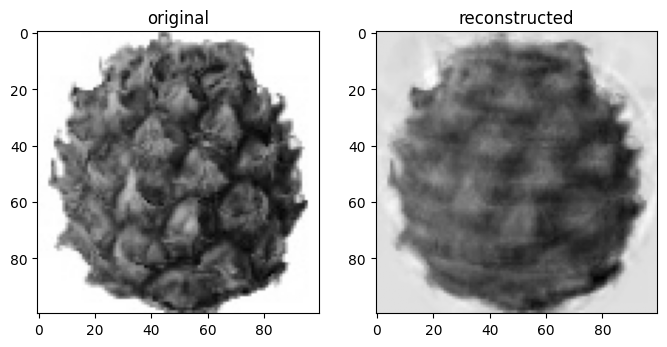

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

# 원본 이미지 시각화
axes[0].imshow(fruits[100], cmap=plt.cm.binary)
axes[0].set_title('original')

# 재구성된 이미지 시각화
axes[1].imshow(reconstructed[100].reshape(100, 100), cmap=plt.cm.binary)
axes[1].set_title('reconstructed')

plt.show()

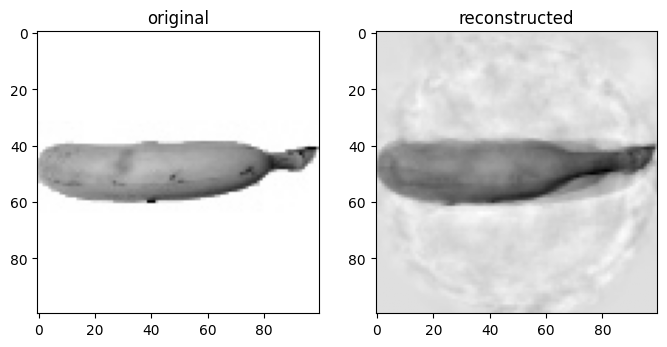

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

# 원본 이미지 시각화
axes[0].imshow(fruits[200], cmap=plt.cm.binary)
axes[0].set_title('original')

# 재구성된 이미지 시각화
axes[1].imshow(reconstructed[200].reshape(100, 100), cmap=plt.cm.binary)
axes[1].set_title('reconstructed')

plt.show()

## 설명된 분산 비율(Explained Variance Ratio)

데이터셋의 분산이 각 주성분 축에 따라 놓여 있는 비율

In [29]:
pca.explained_variance_  # 설명된 분산

array([13825250.21582   ,  3244970.17261193,  2147002.11072804,
        1315766.76701664,  1115261.57182812,  1071019.42512441,
         839909.3351522 ,   670735.97206957,   447908.41090739,
         438278.50206895,   376058.33742495,   308314.26930361,
         286653.1247086 ,   276360.41324009,   226209.88296423,
         210588.11319902,   188950.25665911,   166854.81151665,
         158753.89250673,   156784.14766241,   146172.9076885 ,
         142739.15925164,   133183.8073018 ,   127118.51886608,
         121563.9978921 ,   117267.70755638,   108186.69143077,
         103713.31379143,    99261.91052115,    99135.70605002,
          94228.05385711,    90040.30447215,    86470.73077457,
          83465.17255061,    82295.02646471,    80663.90690084,
          78094.08591389,    75280.88252636,    72420.27941843,
          70737.72071461,    69455.75778694,    63067.95163101,
          62874.74546014,    62293.2008208 ,    59670.32106508,
          59000.95658326,    55741.88321

In [30]:
pca.explained_variance_ratio_  # 설명된 분산 비율

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.005112  , 0.00486381, 0.00480346,
       0.00447836, 0.00437316, 0.00408041, 0.00389459, 0.00372441,
       0.00359278, 0.00331456, 0.00317751, 0.00304113, 0.00303726,
       0.00288691, 0.0027586 , 0.00264924, 0.00255716, 0.00252131,
       0.00247134, 0.0023926 , 0.00230641, 0.00221877, 0.00216722,
       0.00212795, 0.00193224, 0.00192632, 0.0019085 , 0.00182815,
       0.00180764, 0.00170779, 0.00166414, 0.00162624, 0.00156195])

In [31]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9213948508475203)

In [32]:
np.cumsum(pca.explained_variance_ratio_)  # 누적 합계(cumulative summation)

array([0.42357017, 0.52298772, 0.58876636, 0.62907807, 0.66324682,
       0.69606011, 0.72179277, 0.7423424 , 0.75606517, 0.76949289,
       0.78101436, 0.79046031, 0.79924263, 0.8077096 , 0.81464009,
       0.82109197, 0.82688092, 0.83199293, 0.83685674, 0.8416602 ,
       0.84613856, 0.85051173, 0.85459213, 0.85848672, 0.86221113,
       0.86580391, 0.86911847, 0.87229598, 0.87533711, 0.87837438,
       0.88126128, 0.88401989, 0.88666913, 0.88922629, 0.89174759,
       0.89421893, 0.89661153, 0.89891794, 0.90113672, 0.90330394,
       0.90543188, 0.90736412, 0.90929044, 0.91119895, 0.91302709,
       0.91483473, 0.91654252, 0.91820666, 0.9198329 , 0.92139485])

설명된 분산 비율의 누적합계를 시각화

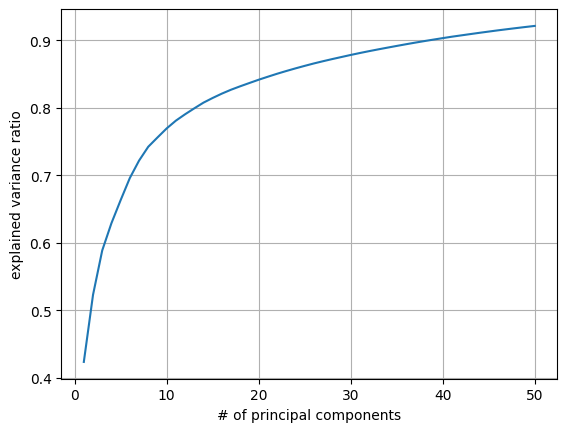

In [34]:
x = np.arange(1, 51)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y)
plt.grid()
plt.xlabel('# of principal components')
plt.ylabel('explained variance ratio')
plt.show()

# 적절한 차원(주성분) 찾기

In [35]:
pca = PCA(random_state=42)  # PCA 객체 생성
pca.fit(X=fruits_2d)  # 모델 훈련 -> 주성분 찾기

PCA(random_state=42)

In [36]:
pca.components_.shape  # PCA가 찾은 주성분 개수 = 300

(300, 10000)

In [38]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9999999999999998)

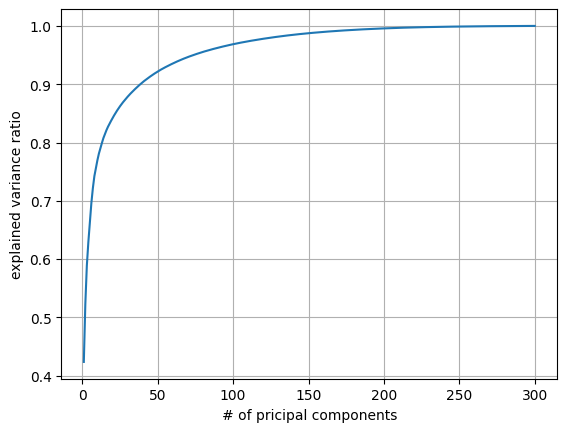

In [39]:
# 설명된 분산 비율 누적 합계 시각화
x = np.arange(1, 301)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y)
plt.grid()
plt.xlabel('# of pricipal components')
plt.ylabel('explained variance ratio')
plt.show()

PCA 객체를 생성할 때 n_components 파라미터를 설명된 분산 비율(0.0 ~ 1.0)로 설정할 수도 있음.

In [40]:
# 95% 설명된 분산 비율을 갖는 주성분 찾기
pca = PCA(n_components=0.95, random_state=42)
pca.fit(X=fruits_2d)

PCA(n_components=0.95, random_state=42)

In [41]:
pca.components_.shape  # PCA가 찾은 95% 설명 분산 비율의 주성분 개수 = 74

(74, 10000)

In [42]:
reduced = pca.transform(X=fruits_2d)  # 차원 축소: (300, 10000) --> (300, 74)
reduced.shape

(300, 74)

In [43]:
reconstructed = pca.inverse_transform(X=reduced)  # 차원 재구성: (300, 74) --> (300, 10000)
reconstructed.shape

(300, 10000)

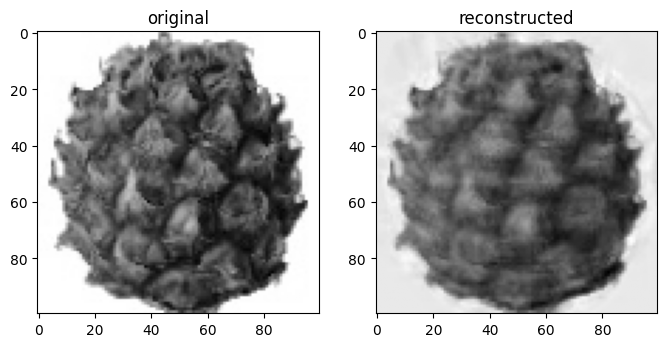

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

# 원본 이미지 시각화
axes[0].imshow(fruits[100], cmap=plt.cm.binary)
axes[0].set_title('original')

# 재구성된 이미지 시각화
axes[1].imshow(reconstructed[100].reshape(100, 100), cmap=plt.cm.binary)
axes[1].set_title('reconstructed')

plt.show()